In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# sys.path.append('/user_data/mmhender/cortilities_holder/')
# import cortilities
# cortilities.__path__

In [2]:
sys.path.append('/user_data/mmhender/cortilities_holder/cortilities/visualization/')
import barplot

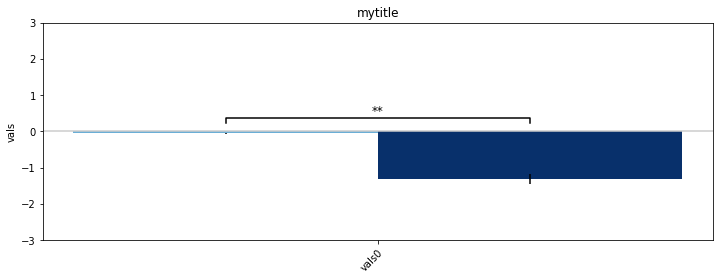

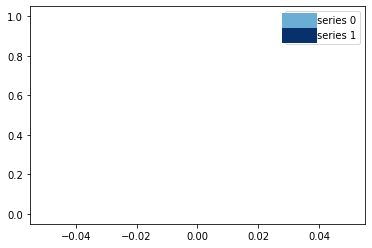

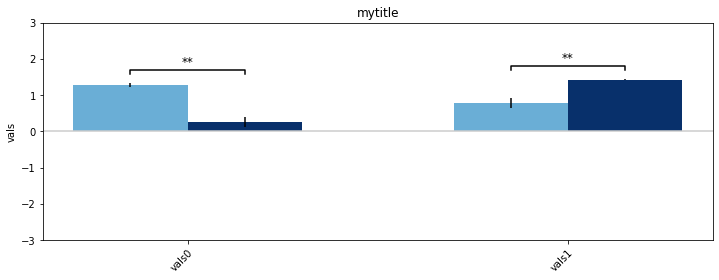

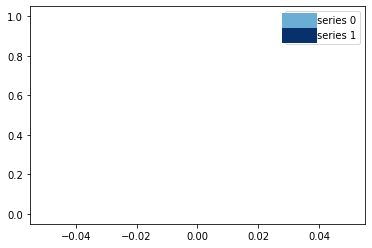

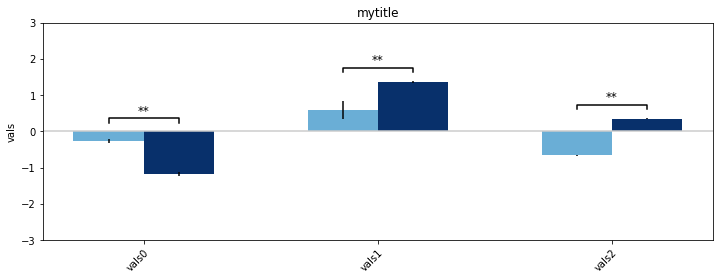

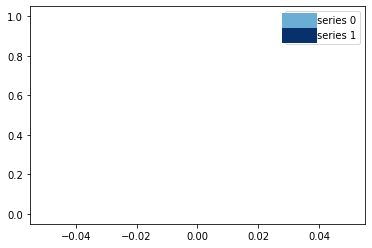

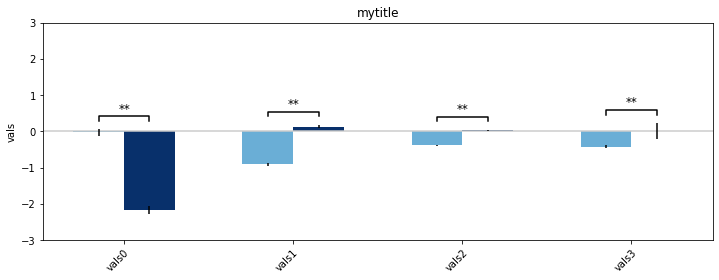

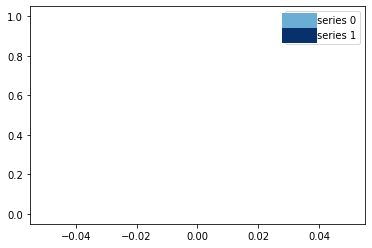

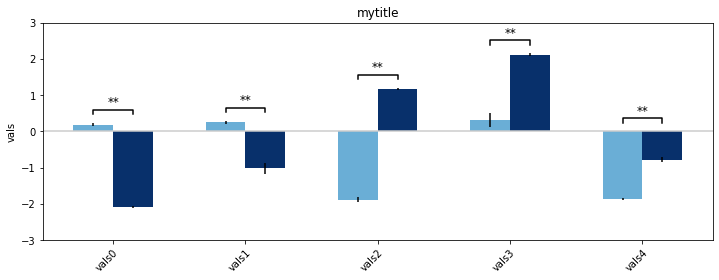

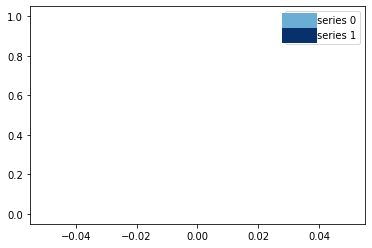

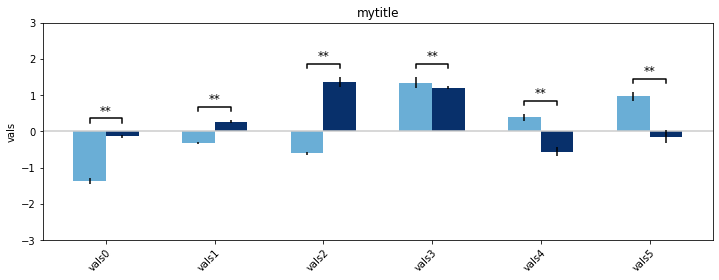

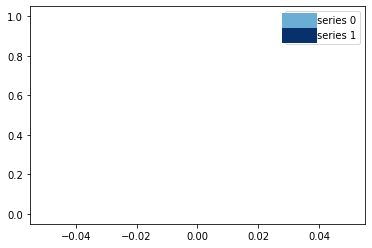

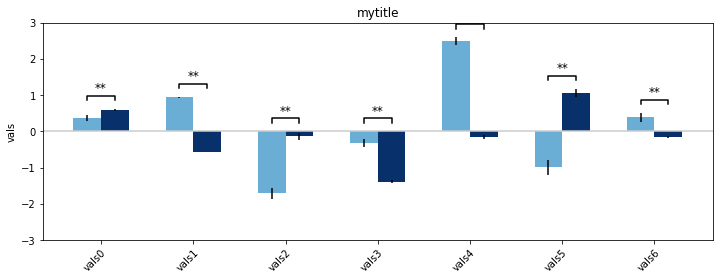

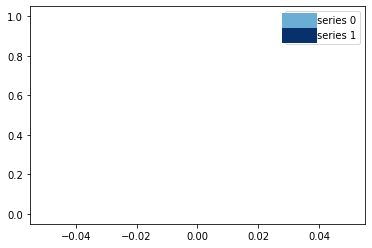

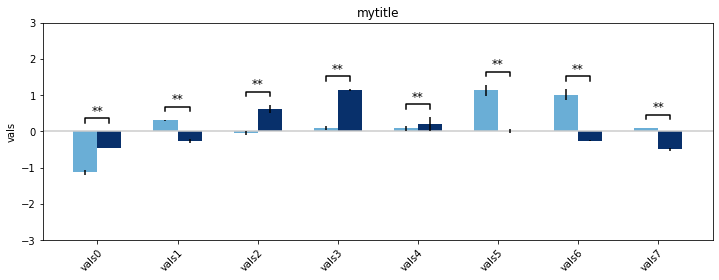

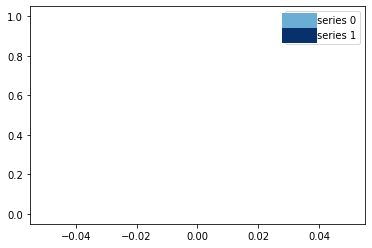

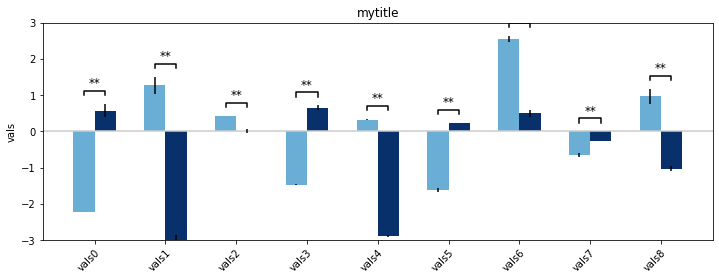

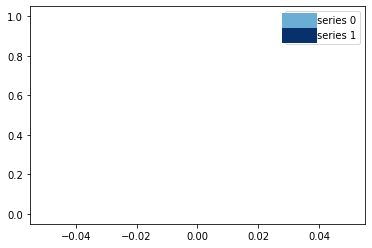

In [7]:

nlevels2 = 2
colors = cm.Blues(np.linspace(0,1,nlevels2+1))[1:]
space = 0.20
ylabel = 'vals'
ylim = [-3, 3]
# ylim = []
horizontal_line_pos = 0
title = 'mytitle'

legend_labels = ['series %d'%ll for ll in np.arange(nlevels2)]
legend_overlaid=False
legend_separate=True
fig_size=(12,4)

for nlevels1 in np.arange(1,10):

    xticklabels = ['vals%d'%ll for ll in np.arange(nlevels1)]

    height_data= np.random.normal(0,1,[nlevels1, nlevels2])
    err_data = []
    err_data = np.abs(np.random.normal(0,1,[nlevels1, nlevels2]))*0.10
#     add_b = list(np.random.normal(0,1,[nlevels1,])>0)
    add_b = [True for ii in range(nlevels1)]
    bracket_text = ['**' for ii in range(nlevels1)]

    fh = barplot.plot_multi_bars(height_data,err_data,\
                        add_brackets = add_b, bracket_text = bracket_text, \
                        colors=colors, space=space, xticklabels = xticklabels, \
                        ylabel=ylabel, \
                        ylims = ylim, horizontal_line_pos=horizontal_line_pos, title=title, \
                        legend_labels=legend_labels, legend_overlaid=legend_overlaid, \
                        legend_separate= legend_separate, fig_size=fig_size)

In [10]:
space = 0.20;
nlevels2 = 4;
edge_pos = [-0.5+space, 0.5-space]
bar_width = (edge_pos[1]-edge_pos[0])/nlevels2
bar_width

0.15

In [11]:
offsets = np.linspace(edge_pos[0]+bar_width/2, edge_pos[1]-bar_width/2, nlevels2)
offsets

array([-0.225, -0.075,  0.075,  0.225])

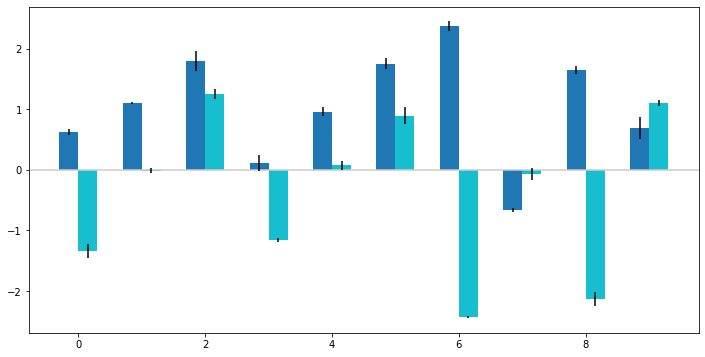

In [43]:
import barplot
nlevels1 = 10
nlevels2 = 2
fh = barplot.plot_multi_bars(np.random.normal(0,1,[nlevels1, nlevels2]), \
                             np.abs(np.random.normal(0,1,[nlevels1, nlevels2]))*0.10, space=0.20)

In [47]:
ax = fh.add_subplot(1,1,1)
ax.annotate('label', [0, 1.5])
plt.show()

In [20]:
ax = fh.gca()
size_a = 5;
size_b = 5;
label = 'lab'
props = {
    "connectionstyle": "bar",
    "arrowstyle": "-",
    "shrinkA": size_a,
    "shrinkB": size_b,
    "linewidth": 1,
}
ax.annotate(
    label, xy=(x, y + 9 * dy), zorder=10, color="k", ha="center", fontsize=12
)
ax.annotate("", xy=(X[i], y + dy), xytext=(X[j], y + dy), arrowprops=props)
    

NameError: name 'x' is not defined

In [ ]:
bracker

In [21]:
ax

<AxesSubplot:>

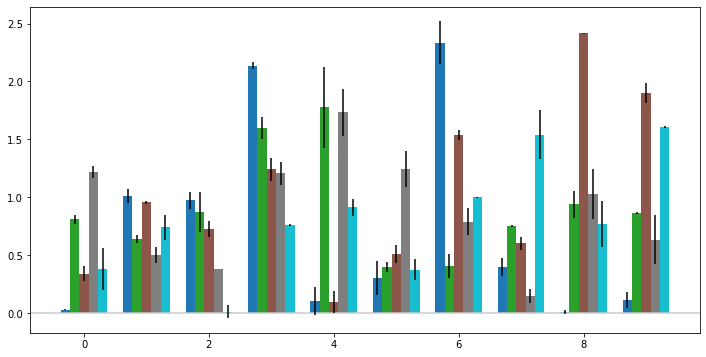

In [4]:
fh

Text(0.0, 1.1835743821702243, 'diff')

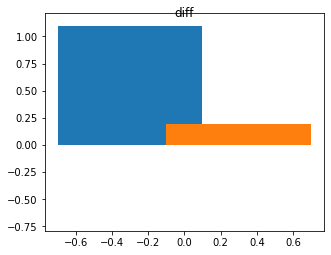

In [41]:
import matplotlib.pyplot as plt
i = 0; j=1;
label = 'diff'
X = [-0.3, 0.3, 0.7, 1.3, 1.7, 2.3]
Y = np.random.normal(0,1,len(X))
size_a=5; size_b=5; dy=0.01

assert i < len(X), "Provided index i out of bounds of list X"
assert j < len(Y), "Provided index j out of bounds of list Y"

fig, ax = plt.subplots(figsize=(5,4))

x = (X[i] + X[j]) / 2
y = max(Y[i], Y[j])
dx = abs(X[i] - X[j])

props = {
    "connectionstyle": "bar",
    "arrowstyle": "-",
    "shrinkA": size_a,
    "shrinkB": size_b,
    "linewidth": 1,
}

ax.bar(x=X[i], width=0.8, height=Y[i])
ax.bar(x=X[j], width=0.8, height=Y[j])
ax.set_ylim([min(Y),max(Y)+12*dy])


ax.annotate(
    label, xy=(x, y + 9 * dy), zorder=10, color="k", ha="center", fontsize=12
)
# ax.annotate("", xy=(X[i], y + dy), xytext=(X[j], y + dy), arrowprops=props)

In [35]:
(X[i], y + dy)

(-0.3, 1.2244400478540551)

In [37]:
(X[j], y + dy)

(0.3, 1.2244400478540551)

In [34]:
(x, y + 9 * dy)

(0.0, 1.3044400478540552)

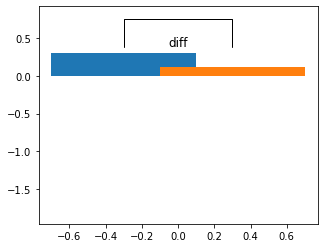

In [27]:
barplot.label_bargraph_diff(i, j, label, X, Y, size_a=5, size_b=5, dy=0.01)

In [360]:
    
def plot_multi_bars(height_data, 
                    err_data=None,
                    colors=None, 
                    space=0.3, \
                    xticklabels=None, 
                    ylabel=None, 
                    ylims=None, \
                    horizontal_line_pos=0,
                    title=None, 
                    legend_labels=None, \
                    legend_overlaid=False, 
                    legend_separate=True, \
                    add_brackets=None, \
                    bracket_text=None, \
                    fig_size=(12,6)):
    
    """Function to create a bar plot with multiple series of data next to each other.
    Allows adding error bars to each bar and adding significance brackets.
    
    Args: 
        height_data (array): heights of bars to plot; shape [nlevels1 x nlevels2] 
            where nlevels1 is the length of each series (i.e., number of clusters of bars),
            and nlevels2 is the number of series (i.e., number of bars per cluster).
            
        err_data (array, optional): symmetrical error bar lengths, should be same 
            size as height_data.
        colors (array, optional): list of colors, [nlevels2 x 3] (or [nlevels2 x 4] 
            if alpha channel)
        space (float, optional): how big of a space between each bar cluster? max is 0.45.
        xticklabels (1d array or list list, optional): name for each bar "cluster", 
            should be [nlevels1] in length.
        ylabel (string, optional): yaxis label
        ylims (2-tuple, optional): yaxis limits
        horizontal_line_pos (float, optional): position to draw a horizontal line on plot.        
        title (string, optional): title
        legend_labels (list of strings, optional): labels for each series in the 
            plot, [nlevels2] length
        legend_overlaid (boolean, optional): want legend drawn windowed on top of the plot?
        legend_separate (boolean, optional): want legend as a separate axis?
        add_brackets (1d array or list of bools, optional): want to draw brackets over each 
            pair of bars? This only applies if nlevels2==2. Must be [nlevels1] in length.
        bracket_text (1d array or list of strings, optional): text to draw over 
            each bracket (if drawing brackets.) Must be [nlevels1] in length.
        fig_size (2-tuple, optional): size to draw the entire figure
    
    """
    assert(space<0.45 and space>0)
    assert(len(height_data.shape)==2)
    nlevels1, nlevels2 = height_data.shape
    if err_data is not None and len(err_data)==0:
        err_data = None
    
    edge_pos = [-0.5+space, 0.5-space]
    bar_width = (edge_pos[1]-edge_pos[0])/nlevels2
    offsets = np.linspace(edge_pos[0]+bar_width/2, edge_pos[1]-bar_width/2, nlevels2)
    if colors is None:
        colors = cm.tab10(np.linspace(0,1,nlevels2))
        
    fh = plt.figure(figsize=fig_size)
    ax = plt.subplot(1,1,1)
    lh = []
    for ll in range(nlevels2):
        
        h = plt.bar(np.arange(nlevels1)+offsets[ll], height_data[:,ll], \
                width=bar_width, color=colors[ll,:])
        lh.append(h)
        if err_data is not None:
            assert(err_data.shape[0]==nlevels1 and err_data.shape[1]==nlevels2)
            plt.errorbar(np.arange(nlevels1)+offsets[ll], \
                     height_data[:,ll], err_data[:,ll], \
                     ecolor='k',zorder=10, ls='none')
    
    if xticklabels is not None: 
        assert(len(xticklabels)==nlevels1)
        plt.xticks(np.arange(nlevels1), xticklabels, \
               rotation=45,ha='right',rotation_mode='anchor')
    if ylims is not None and ylims!=[]:
        plt.ylim(ylims)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if horizontal_line_pos is not None:
        plt.axhline(horizontal_line_pos, color=[0.8, 0.8, 0.8])
    if title is not None:
        plt.title(title)
        
    if legend_overlaid and legend_labels is not None:
        assert(len(legend_labels)==nlevels2)
        ax.legend(lh, legend_labels)
 
    if add_brackets is not None and nlevels2==2:
        assert(len(add_brackets)==nlevels1)
        assert(bracket_text is None or len(bracket_text)==nlevels1)
        orig_ylims = ax.get_ylim()
        vert_space = 0.02 * (orig_ylims[1]-orig_ylims[0])
        ymax = orig_ylims[1]

        for xx in np.where(add_brackets)[0]:

            # vertical position of the label is always above the bars, 
            # or above the x-axis if bars are negative.
            if err_data is not None:                
                max_ht = np.max([np.max(height_data[xx,:]+err_data[xx,:]), 0])   
            else:
                max_ht = np.max([np.max(height_data[xx,:]), 0])              
            brack_bottom = max_ht+vert_space*2
            brack_top = max_ht+vert_space*3
            text_lab_ht = max_ht+vert_space*4
            ymax = np.max([ymax, text_lab_ht+vert_space*3])

            plt.plot([xx+offsets[0], xx+offsets[0], xx+offsets[1], xx+offsets[1]], \
                    [brack_bottom, brack_top, brack_top, brack_bottom], '-', color='k')
            
            if bracket_text is not None:
                ax.annotate( bracket_text[xx], xy=(xx, text_lab_ht), zorder=10, 
                    color="k", ha="center", fontsize=12)
                
            
        
        if ylim is None or ylim==[]:
            # adjust max y limit so text doesn't get cut off.
            plt.ylim([orig_ylims[0], ymax])

    
    if legend_separate and legend_labels is not None:
        assert(len(legend_labels)==nlevels2)
        plt.figure();
        for ll in range(nlevels2):
            plt.plot(0,ll,'-',color=colors[ll,:],linewidth=15)
        plt.legend(legend_labels)
    
        
    return fh

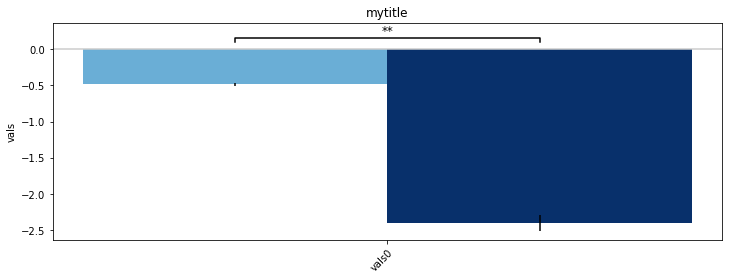

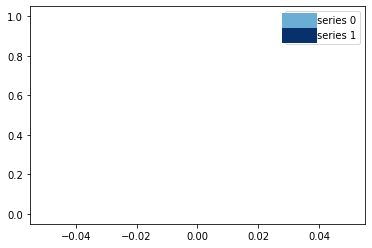

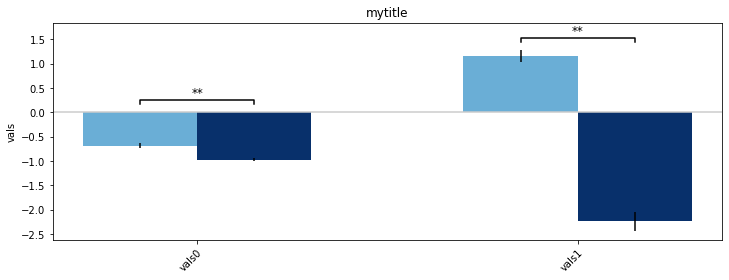

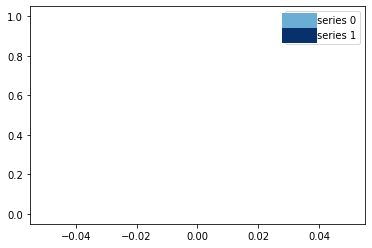

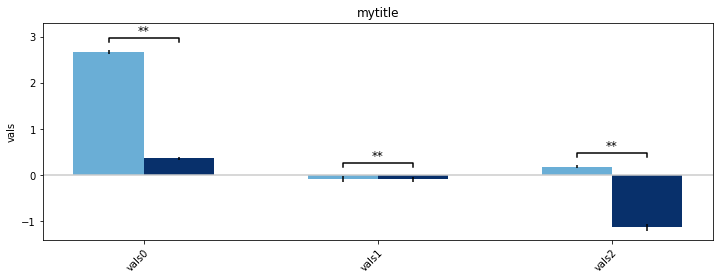

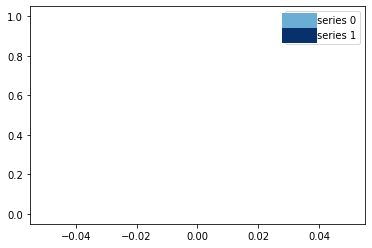

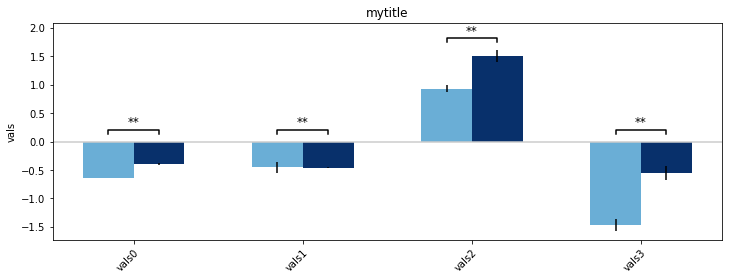

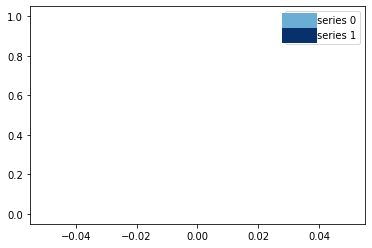

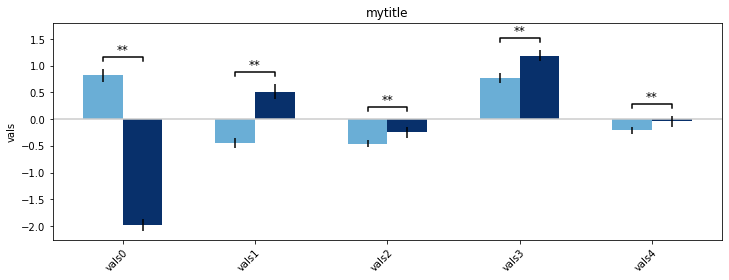

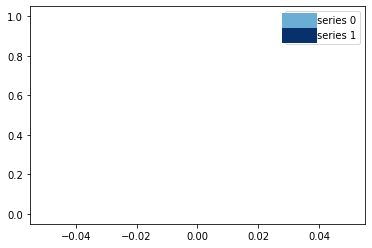

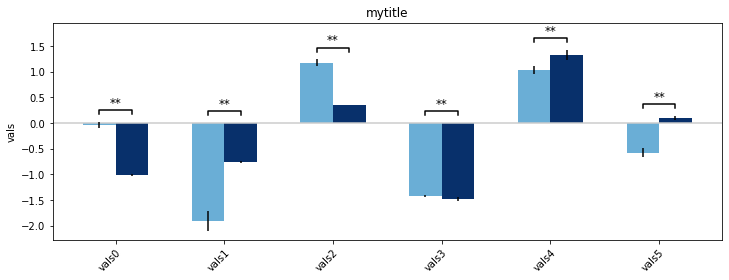

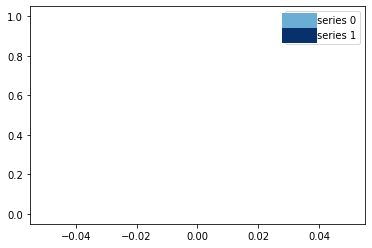

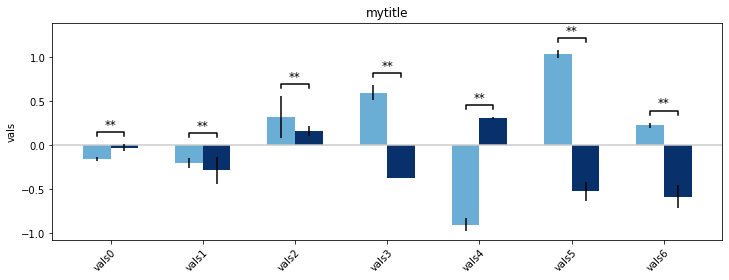

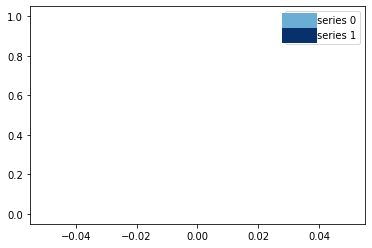

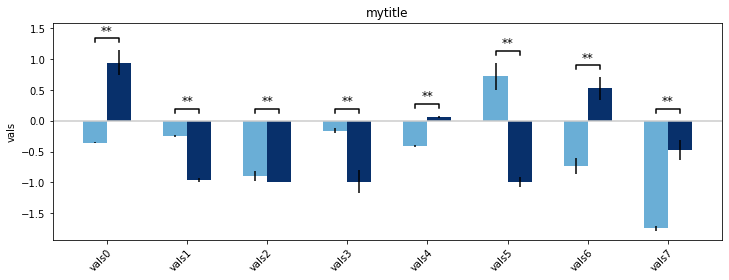

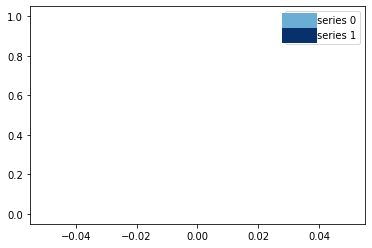

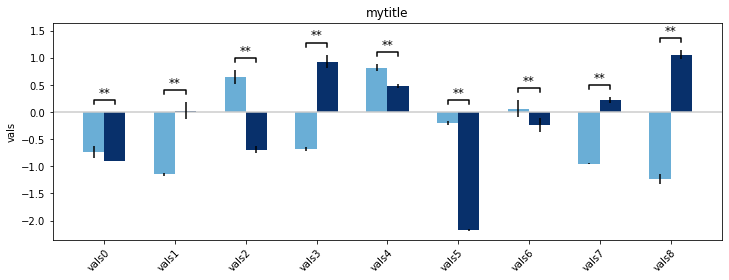

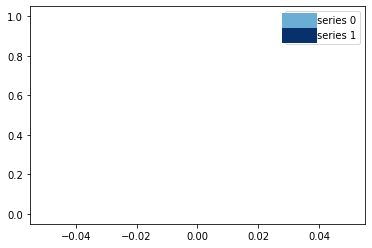

In [361]:
import warnings

with warnings.catch_warnings():

    warnings.filterwarnings('error')

    nlevels2 = 2
    colors = cm.Blues(np.linspace(0,1,nlevels2+1))[1:]
    space = 0.20
    ylabel = 'vals'
    # ylim = [-3, 3]
    ylim = []
    horizontal_line_pos = 0
    title = 'mytitle'

    legend_labels = ['series %d'%ll for ll in np.arange(nlevels2)]
    legend_overlaid=False
    legend_separate=True
    fig_size=(12,4)

    for nlevels1 in np.arange(1,10):

        xticklabels = ['vals%d'%ll for ll in np.arange(nlevels1)]

        height_data= np.random.normal(0,1,[nlevels1, nlevels2])
        err_data = []
        err_data = np.abs(np.random.normal(0,1,[nlevels1, nlevels2]))*0.10
    #     add_b = list(np.random.normal(0,1,[nlevels1,])>0)
        add_b = [True for ii in range(nlevels1)]
        bracket_text = ['**' for ii in range(nlevels1)]

        fh = plot_multi_bars(height_data,err_data,\
                            add_brackets = add_b, bracket_text = bracket_text, \
                            colors=colors, space=space, xticklabels = xticklabels, \
                            ylabel=ylabel, \
                            ylims = ylim, horizontal_line_pos=horizontal_line_pos, title=title, \
                            legend_labels=legend_labels, legend_overlaid=legend_overlaid, \
                            legend_separate= legend_separate, fig_size=fig_size)

In [358]:
err_data = []
err_data==[]

True

In [359]:
len(err_data)

0